# **Graduate Admission Analysis**

## **Importing Libraries and Data**
Importing libraries and setting the default style in Seaborn.

In [3]:
import numpy as np
import pandas as pd
#import os
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

import dataset

In [4]:
df = pd.read_csv("Admission_Predict.csv")
df = df.drop(df.columns[[0]], axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.corr(method='pearson')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [7]:
df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [23]:
print("Mean Value:")
df.mean()


Mean Value:


GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [24]:
print("Variance Value:")
df.var()

Variance Value:


GRE Score            131.644555
TOEFL Score           36.838997
University Rating      1.308114
SOP                    1.013784
LOR                    0.807262
CGPA                   0.355594
Research               0.248365
Chance of Admit        0.020337
dtype: float64

In [10]:
df.std()

GRE Score            11.473646
TOEFL Score           6.069514
University Rating     1.143728
SOP                   1.006869
LOR                   0.898478
CGPA                  0.596317
Research              0.498362
Chance of Admit       0.142609
dtype: float64

In [11]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)


heatmap:

<AxesSubplot:>

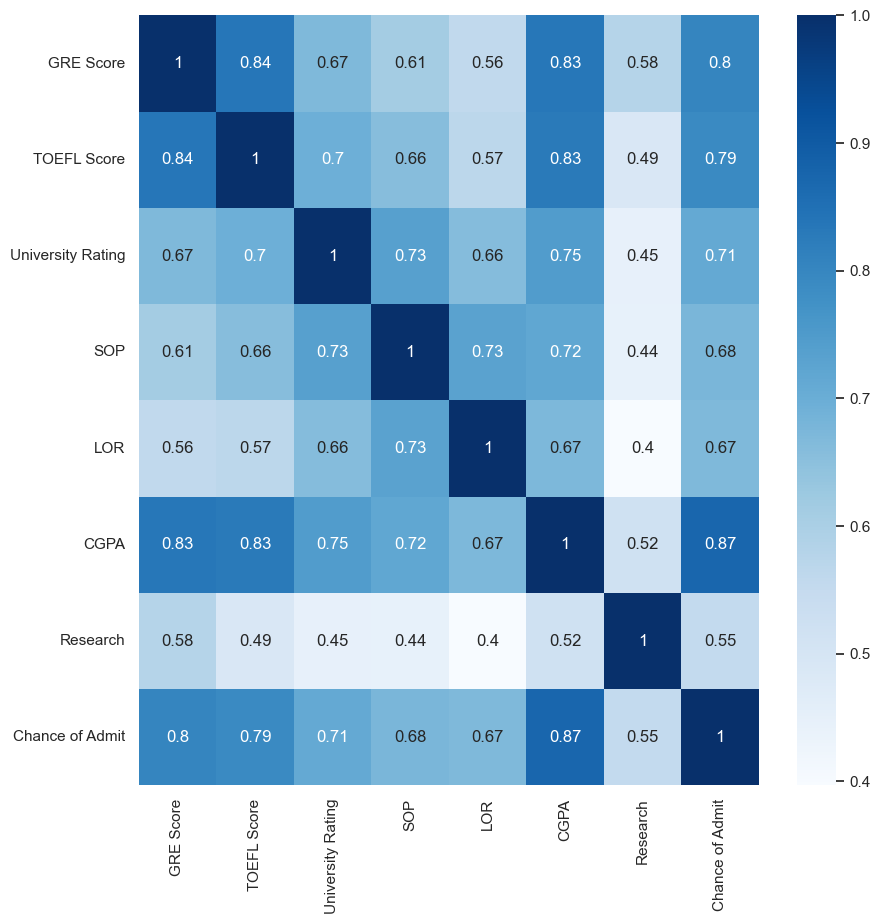

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

The top three features that affect the Chance to Admit are:
1. CGPA
2. GRE Score
3. TOEFL Score

### **GPA**

The Cumulative Grade Point Average is a 10 point grading system.


### **GPA vs Chance of Admit**


/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'CGPA vs Chance of Admit')

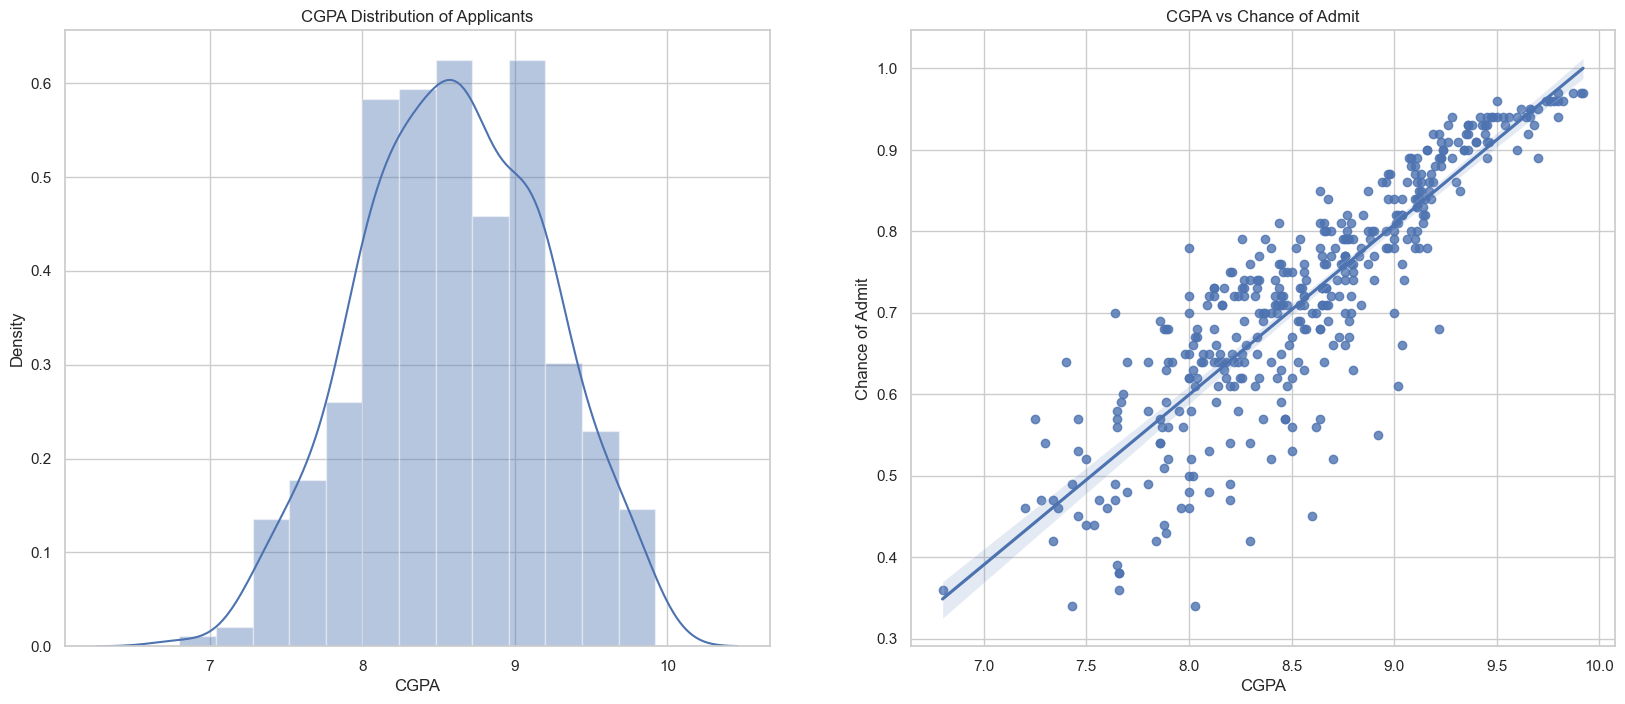

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

### **GRE Score**



### **GRE Score vs Chance of Admit**




/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

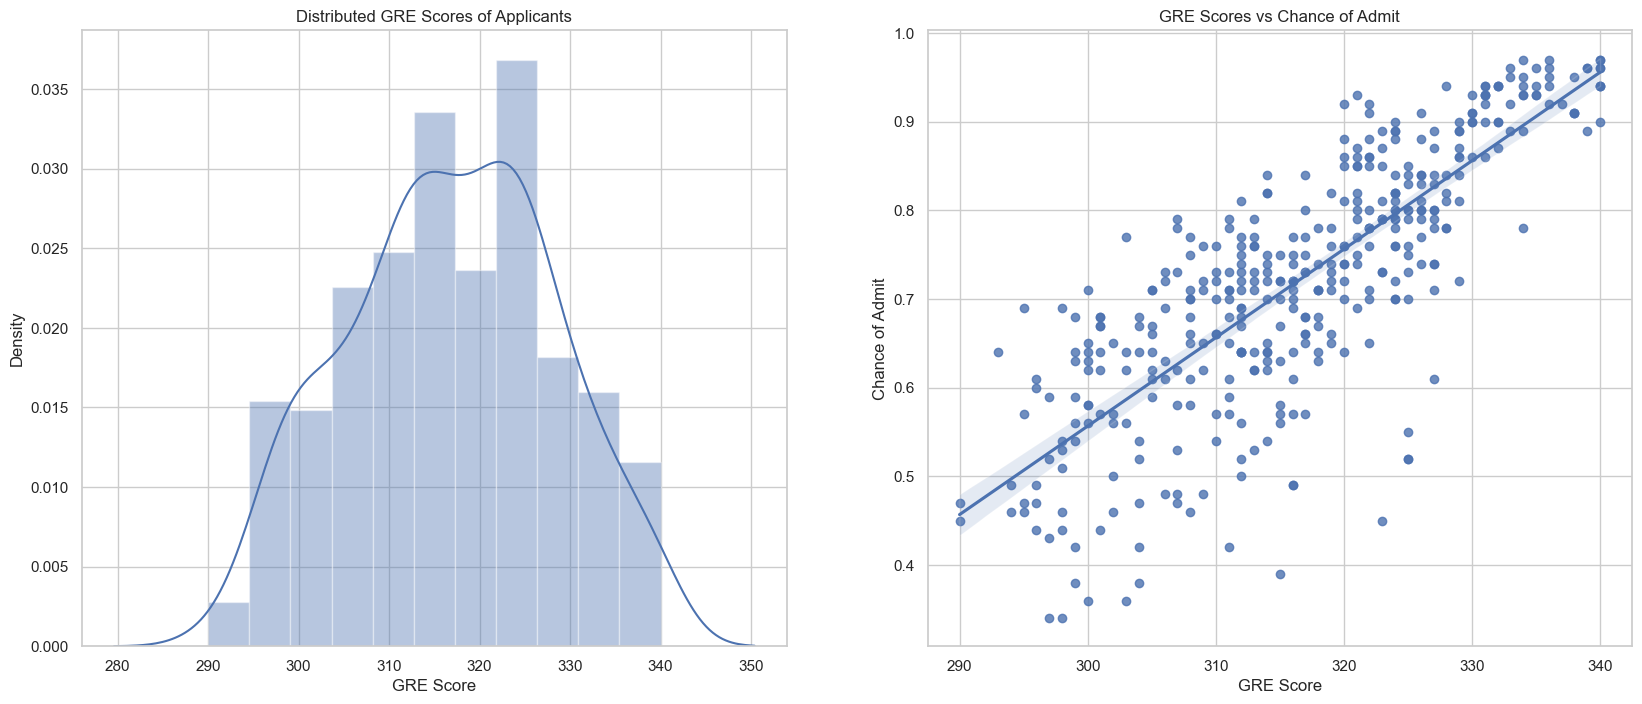

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['GRE Score'])
plt.title('Distributed GRE Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE Score'], df['Chance of Admit'])
plt.title('GRE Scores vs Chance of Admit')

### **TOEFL Score**



### **TOEFL Score vs Chance of Admit**



/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

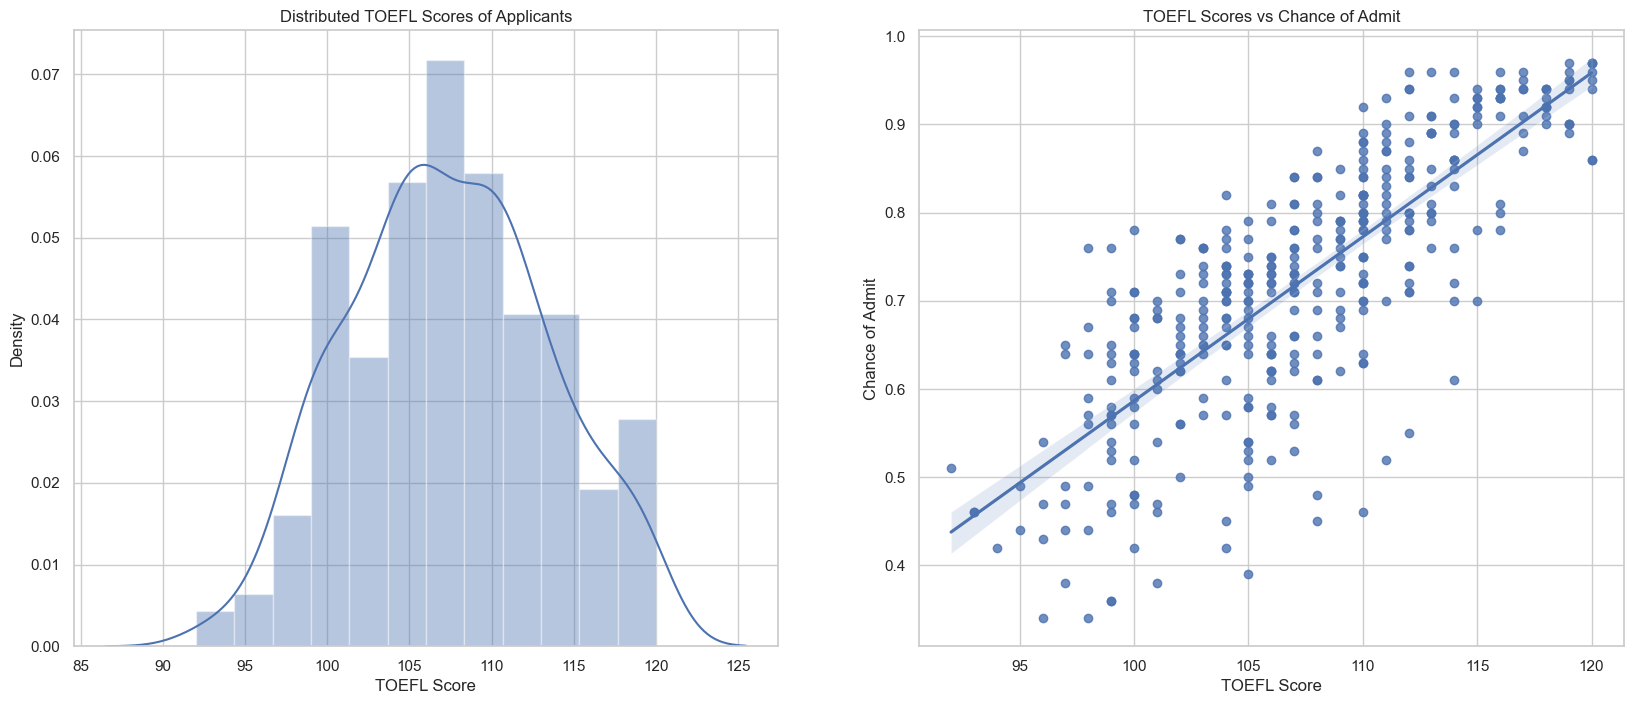

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL Score'])
plt.title('Distributed TOEFL Scores of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL Score'], df['Chance of Admit'])
plt.title('TOEFL Scores vs Chance of Admit')

### **Research Exp**

[Text(0,0,'No Research Experience'), Text(0,0,'Has Research Experience')]

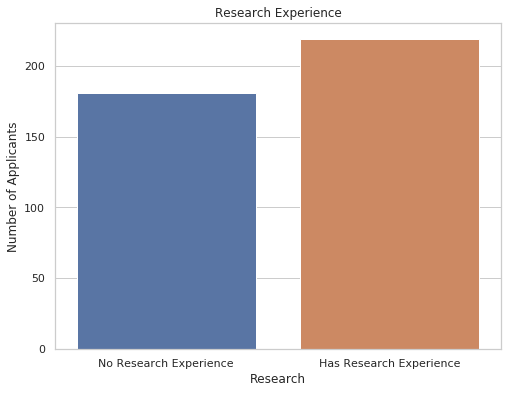

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

### **University Rating**

Let's see the distribution of applicants coming from each kind of university.

Most applicants come from a tier 3 and tier 2 university.

Text(0,0.5,'Number of Applicants')

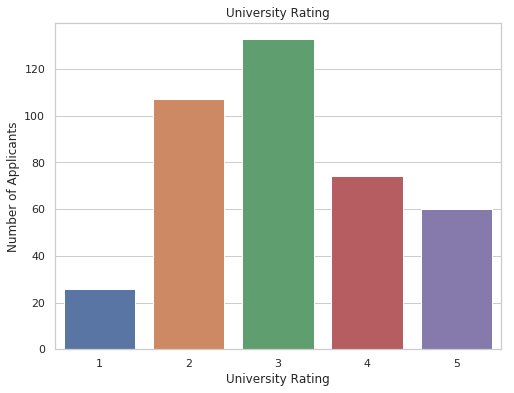

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(df['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

In [40]:
import plotly.express as px
fig = px.box(df, x="University Rating", y="Chance of Admit")
fig.update_layout(title='University Rating Vs Chance of Admit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='red')
fig.show()

fig = px.scatter(df, x="University Rating", y="Chance of Admit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='blue')
fig.update_layout(title='University Rating Vs Chance of Admit',
                  template='plotly_white')
fig.show()


## **Machine Learning Part**

In [23]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [51]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.004617003377285015
R-squared Score: 0.821208259148699


## **Machine Learning **


1. Linear Regression
2. Decision Trees
3. Random Forests

### **Linear Regression**

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
linreg_score = (linreg.score(X_test, y_test))*100
linreg_score

82.1208259148699

### **Decision Trees**

In [48]:
dec_tree = DecisionTreeRegressor(random_state=0, max_depth=6)
dec_tree.fit(X_train, y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_score = (dec_tree.score(X_test, y_test))*100
dec_tree_score

73.02776364703219

### **Random Forests**

In [67]:
forest = RandomForestRegressor(n_estimators=108,max_depth=5,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

82.03511985595362

### **Comparing Scores**

/Users/colin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Accuracy')

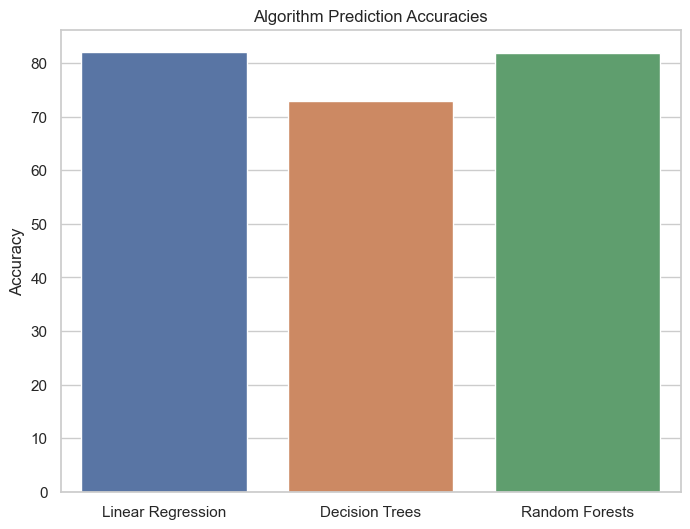

In [50]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests']
Scores = np.array([linreg_score, dec_tree_score, forest_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

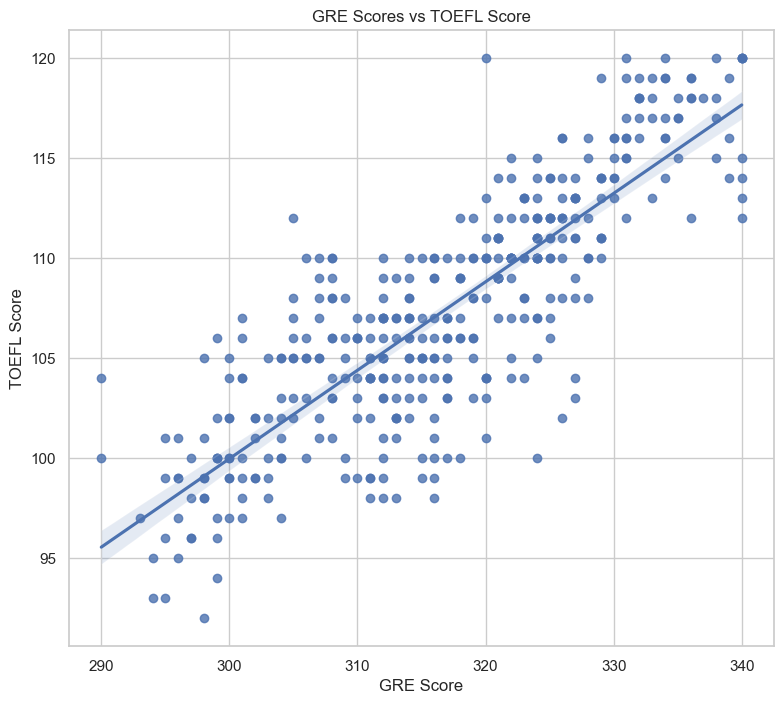

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.regplot(df['GRE Score'], df['TOEFL Score'])
plt.title('GRE Scores vs TOEFL Score')

fig = px.box(df, x="TOEFL Score", y="GRE Score")
fig.update_layout(title='TOEFL Score Vs GRE Score',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#19e6e6')
fig.show()
fig = px.scatter(df, x="TOEFL Score", y="GRE Score", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_layout(title='TOEFL Score Vs GRE Score',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#19e6e6')
fig.show()

In [43]:
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.004617003377285015
R-squared Score: 0.821208259148699
